https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container

## Load library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #set style as seaborn
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans,MiniBatchKMeans


import pickle

Using TensorFlow backend.


## Load Data

In [4]:
## D:\study\notebook\2019厦门国际银行“数创金融杯”数据建模大赛\data
path = r'D:\study\notebook\2019厦门国际银行“数创金融杯”数据建模大赛\data\\'

train_x_file = path + 'train.csv'
train_target_file = path + 'train_target.csv'
test_x_file = path + 'test.csv'

def load_data():
    train_x = pd.read_csv(train_x_file, low_memory = False)
    train_y = pd.read_csv(train_target_file,low_memory = False)
    test_x = pd.read_csv(test_x_file,  low_memory = False)
    return train_x,train_y,test_x


train_x,train_y,test_x = load_data()
#data = train_x.merge(train_y, on='id', how='left')
train_x.replace(np.NaN,0,inplace=True)
train_x.head()

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew
0,1,640582,1,2,27,640500,0,8,5.963,3,...,-999,0,9,6,1,0,1,0,0,1
1,2,621023,2,2,25,640600,0,3,6.467,3,...,99,11,6,5,1,0,1,0,0,1
2,3,641283,1,2,37,641200,70,5,0.596,1,...,70,0,1,6,0,0,0,0,0,1
3,4,340821,3,2,29,340821,0,4,6.300,3,...,-999,-999,13,6,1,0,1,0,0,1
4,5,732628,2,2,22,732628,0,2,6.700,2,...,99,11,8,3,1,0,1,0,0,1


In [3]:
print(train_x.columns[:20])
print(train_x.columns[20:40])
print(train_x.columns[40:60])
print(train_x.columns[60:80])
print(train_x.columns[80:])

Index(['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job',
       'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6',
       'x_7', 'x_8', 'x_9'],
      dtype='object')
Index(['x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27',
       'x_28', 'x_29'],
      dtype='object')
Index(['x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47',
       'x_48', 'x_49'],
      dtype='object')
Index(['x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58',
       'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67',
       'x_68', 'x_69'],
      dtype='object')
Index(['x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'certValidBegin', 'certValidStop', 'bankCard', 'ethnic', 'residentAddr',
       'highestEdu', 'li

##  EDA

正常贷款： 99.27 % of the dataset
逾期贷款： 0.73 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Default || 1: Default)')

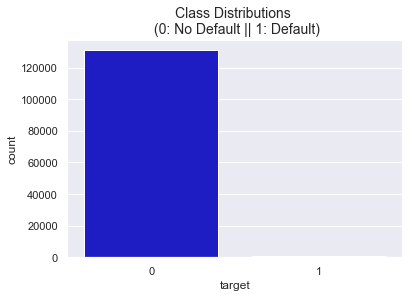

In [3]:
# The classes are heavily skewed we need to solve this issue later.
print('正常贷款：', round(train_y['target'].value_counts()[0]/len(train_y) * 100,2), '% of the dataset')
print('逾期贷款：', round(train_y['target'].value_counts()[1]/len(train_y) * 100,2), '% of the dataset')

colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=train_y, palette=colors)
plt.title('Class Distributions \n (0: No Default || 1: Default)', fontsize=14)

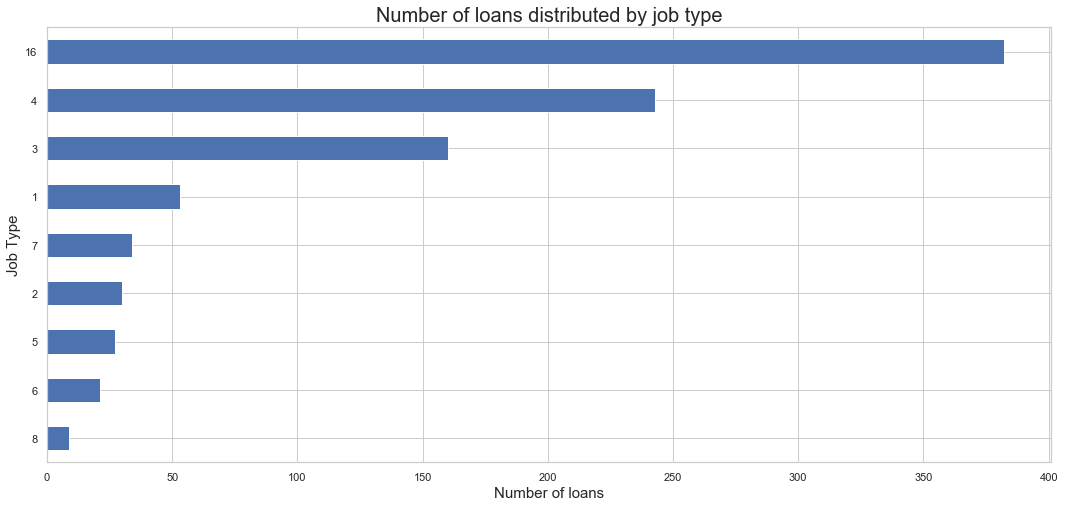

In [40]:
sns.set_style('whitegrid')
#subplot(numRows, numCols, plotNum)
plt.figure()

data[(data.target == 1)]['job'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(18,8))

plt.title('Number of loans distributed by job type',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Job Type',fontsize=15);

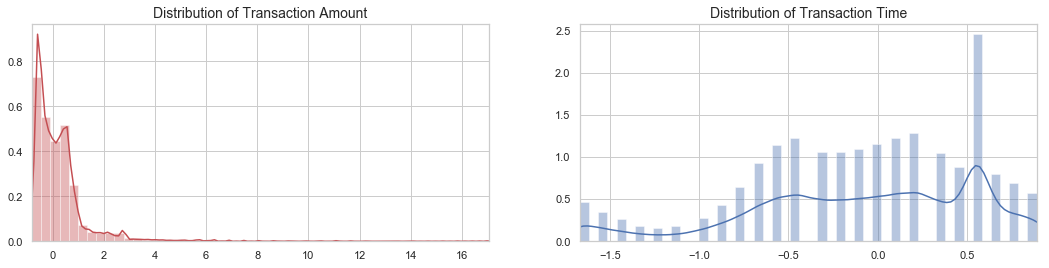

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['scaled_lmt'].values
time_val = data['scaled_setupHour'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

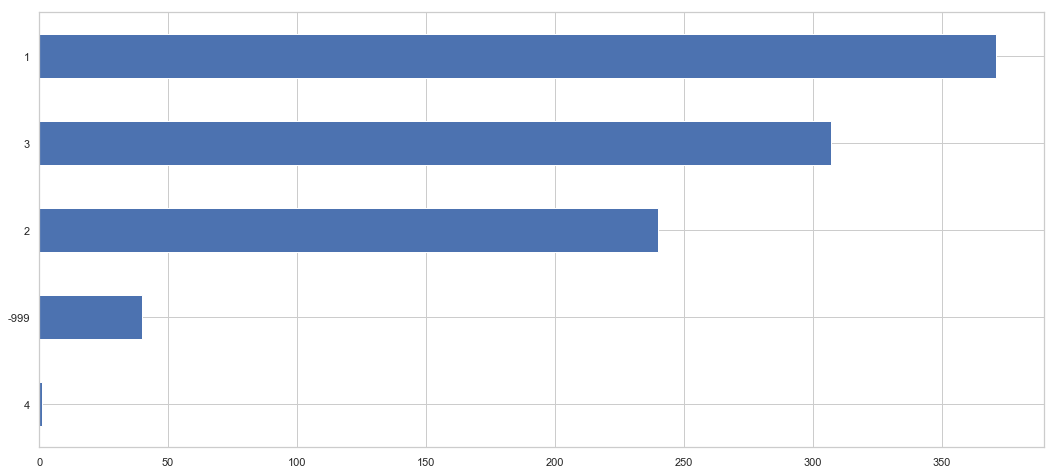

In [50]:
data[(data.target ==1)]['basicLevel'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(18,8))

In [43]:
print(data.columns[:20])
print(data.columns[20:40])
print(data.columns[40:60])
print(data.columns[60:80])
print(data.columns[80:])

Index(['certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job',
       'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7',
       'x_8', 'x_9', 'x_10', 'x_11'],
      dtype='object')
Index(['x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20',
       'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29',
       'x_30', 'x_31'],
      dtype='object')
Index(['x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40',
       'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49',
       'x_50', 'x_51'],
      dtype='object')
Index(['x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60',
       'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69',
       'x_70', 'x_71'],
      dtype='object')
Index(['x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'bankCard',
       'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'weekday',
       'ncloseCreditCard', 'unpayIn

In [25]:
data.isNew.value_counts()

0    84196
1    47833
Name: isNew, dtype: int64

## 变量分箱

> 采用卡方（ChiMerge）分箱，要求分箱完成之后：

> - 不超过5箱（本模型默认不超过5箱）
> - 坏样本率（Bad Rate）单调
> - 每箱同时包含好坏样本
> - 如有特殊值如-1单独成一箱，此箱不参与Bad Rate单调性检验
> - 连续型的变量可以直接进行分箱，对于类别型的变量分为以下几种情况：

- 当类别型变量取值比较多时（本例中大于5），先用bad rate 进行编码，然后放入连续型变量列表中，使用连续型变量分箱的方法进行分箱。
当取值较少时（本例中小于等于5），分两种情况：
 - （1）如果每种类别同时包含好坏样本，则无需分箱；
 - （2）如果有类别只包含好坏样本的一种，则需要合并；


- 作者：乘物以游心
- 链接：https://www.jianshu.com/p/eaf80fcaeed0
- 来源：简书
- 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [5]:
train_x.x_33.value_counts()

 3      43821
 1      41166
 2      22697
 4      11492
 5      11044
 6       1498
-999      311
Name: x_33, dtype: int64

In [6]:
print(train_x.columns[:20])
print(train_x.columns[20:40])
print(train_x.columns[40:60])
print(train_x.columns[60:80])
print(train_x.columns[80:])

Index(['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job',
       'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6',
       'x_7', 'x_8', 'x_9'],
      dtype='object')
Index(['x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27',
       'x_28', 'x_29'],
      dtype='object')
Index(['x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47',
       'x_48', 'x_49'],
      dtype='object')
Index(['x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58',
       'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67',
       'x_68', 'x_69'],
      dtype='object')
Index(['x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'certValidBegin', 'certValidStop', 'bankCard', 'ethnic', 'residentAddr',
       'highestEdu', 'li

### 特征分类（数值型/分类变量）

In [25]:
#我们初步挑选变量如下，分为两类：数值型（连续型）的和类别型的变量
data = train_x.merge(train_y, on='id', how='left')

#remove :['certValidBegin','certValidStop']
num_features = [ 'age','lmt', 'setupHour',  'ncloseCreditCard',
       'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan']

#remove :['id','isnew']
cat_features = ['certId', 'loanProduct', 'gender',  'dist', 'edu', 'job','basicLevel',
       'bankCard', 'ethnic', 'residentAddr','highestEdu', 'linkRela','weekday',
       'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6',
       'x_7', 'x_8', 'x_9','x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27',
       'x_28', 'x_29','x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47',
       'x_48', 'x_49','x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58',
       'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67',
       'x_68', 'x_69','x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',]

print("Original shape:{}".format(data.shape))

print("num_features shape:{}".format(len(num_features)))
print("cat_features shape:{}".format(len(cat_features)))

Original shape:(132029, 105)
num_features shape:8
cat_features shape:92


### 类别型变量分类

In [26]:
more_value_features = []
less_value_features = []
# 第一步，检查类别型变量中，哪些变量取值超过5

for var in cat_features:
    valueCounts = len(set(data[var]))
    #print(var," ->",valueCounts)
    if valueCounts > 5:
        more_value_features.append(var)  #取值超过5的变量，需要bad rate编码，再用卡方分箱法进行分箱
    else:
        less_value_features.append(var)
        
print("more_value_features: {} , total_num: {}".format(more_value_features, len(more_value_features)))
print("less_value_features: {}, total_num: {}".format(less_value_features,len(less_value_features)))

more_value_features: ['certId', 'dist', 'edu', 'job', 'basicLevel', 'bankCard', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'weekday', 'x_33', 'x_34'] , total_num: 13
less_value_features: ['loanProduct', 'gender', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78'], total_num: 79


In [27]:
print(len(more_value_features))
print(len(less_value_features))

13
79


#### 特征合并（取值<5时）

In [28]:
#第二步，当取值<5时：如果每种类别同时包含好坏样本，无需分箱；如果有类别只包含好坏样本的一种，需要合并。
from utils import  BinBadRate,MergeBad0

merge_bin_dict = {}  #存放需要合并的变量，以及合并方法
var_bin_list = []   #由于某个取值没有好或者坏样本而需要合并的变量
for col in less_value_features:
    print("do {} ....".format(col))
    binBadRate = BinBadRate(data, col, 'target')[0]
    if min(binBadRate.values()) == 0 :  #由于某个取值没有坏样本而进行合并
        print ('{} need to be combined due to 0 bad rate'.format(col))
        combine_bin = MergeBad0(data, col, 'target')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        data[newVar] = data[col].map(combine_bin)
        data.drop([col], axis=1, inplace=True)
        var_bin_list.append(newVar)
        #less_value_features.remove(col)

    if max(binBadRate.values()) == 1:    #由于某个取值没有好样本而进行合并
        print ('{} need to be combined due to 0 good rate'.format(col))
        combine_bin = MergeBad0(data, col, 'target',direction = 'good')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        data[newVar] = data[col].map(combine_bin)
        data.drop([col], axis=1, inplace=True)
        var_bin_list.append(newVar)
        #less_value_features.remove(col)


#less_value_features里剩下不需要合并的变量
less_value_features = [i for i in less_value_features if i + '_Bin' not in var_bin_list]


#保存merge_bin_dict
file1 = open(path+'merge_bin_dict.pkl','wb+')
pickle.dump(merge_bin_dict,file1)
file1.close()

do loanProduct ....
do gender ....
do x_0 ....
do x_1 ....
do x_2 ....
do x_3 ....
do x_4 ....
do x_5 ....
do x_6 ....
do x_7 ....
do x_8 ....
do x_9 ....
do x_10 ....
do x_11 ....
do x_12 ....
do x_13 ....
do x_14 ....
do x_15 ....
do x_16 ....
do x_17 ....
do x_18 ....
do x_19 ....
do x_20 ....
do x_21 ....
do x_22 ....
do x_23 ....
do x_24 ....
do x_25 ....
do x_26 ....
do x_27 ....
do x_28 ....
do x_29 ....
do x_30 ....
do x_31 ....
x_31 need to be combined due to 0 bad rate
do x_32 ....
x_32 need to be combined due to 0 bad rate
do x_35 ....
do x_36 ....
do x_37 ....
do x_38 ....
do x_39 ....
x_39 need to be combined due to 0 bad rate
do x_40 ....
do x_41 ....
do x_42 ....
x_42 need to be combined due to 0 bad rate
do x_43 ....
do x_44 ....
do x_45 ....
do x_46 ....
do x_47 ....
do x_48 ....
do x_49 ....
do x_50 ....
do x_51 ....
do x_52 ....
do x_53 ....
do x_54 ....
do x_55 ....
do x_56 ....
do x_57 ....
do x_58 ....
do x_59 ....
do x_60 ....
do x_61 ....
do x_62 ....
do x_63 ..

In [29]:
print(len(less_value_features))
print(len(var_bin_list))
print(len(merge_bin_dict))

75
4
4


In [30]:
print(var_bin_list)

['x_31_Bin', 'x_32_Bin', 'x_39_Bin', 'x_42_Bin']


#### 特征类别调整（取值>5时）

In [31]:
#（ii） 第三步，当取值>5时：用bad rate进行编码，放入连续型变量里。
br_encoding_dict = {}   #记录按照bad rate进行编码的变量，及编码方式
from utils import BadRateEncoding
for col in more_value_features:
    #print("do {} ....".format(col))
    br_encoding = BadRateEncoding(data, col, 'target')
    data[col+'_br_encoding'] = br_encoding['encoding']
    data.drop([col], axis=1, inplace=True)
    
    br_encoding_dict[col] = br_encoding['bad_rate']
    num_features.append(col+'_br_encoding')
    
file2 = open(path+'br_encoding_dict.pkl','wb+')
pickle.dump(br_encoding_dict,file2)
file2.close()

In [32]:
print("less_value_features:",len(less_value_features))
print("var_bin_list:",len(var_bin_list))
print("merge_bin_dict:",len(merge_bin_dict))
print("more_value_features:",len(more_value_features))
print("br_encoding_dict:",len(br_encoding_dict))

less_value_features: 75
var_bin_list: 4
merge_bin_dict: 4
more_value_features: 13
br_encoding_dict: 13


In [33]:
print(num_features)

['age', 'lmt', 'setupHour', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'certId_br_encoding', 'dist_br_encoding', 'edu_br_encoding', 'job_br_encoding', 'basicLevel_br_encoding', 'bankCard_br_encoding', 'ethnic_br_encoding', 'residentAddr_br_encoding', 'highestEdu_br_encoding', 'linkRela_br_encoding', 'weekday_br_encoding', 'x_33_br_encoding', 'x_34_br_encoding']


In [34]:
print(data.columns.tolist())

['id', 'loanProduct', 'gender', 'age', 'lmt', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_35', 'x_36', 'x_37', 'x_38', 'x_40', 'x_41', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'setupHour', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'target', 'x_31_Bin', 'x_32_Bin', 'x_39_Bin', 'x_42_Bin', 'certId_br_encoding', 'dist_br_encoding', 'edu_br_encoding', 'job_br_encoding', 'basicLevel_br_encoding', 'bankCard_br_encoding', 'ethnic_br_encoding', 'residentAddr_br_encodi

###  连续变量特征分箱

In [ ]:
#第四步，分箱，对连续型变量列表num_features进行卡方分箱。本文分箱后的最多的箱数为5箱。
from  utils import Chi2,ChiMerge,BadRateMonotone,AssignBin,SplitData,AssignGroup

# （iii）对连续型变量进行分箱，包括（ii）中的变量
continous_merged_dict = {}
for col in num_features:
    print("{} is in processing".format(col))
    #if -1 not in set(data[col]):   #－1会当成特殊值处理。如果没有－1，则所有取值都参与分箱
    if -999 not in set(data[col]):   #-999会当成特殊值处理。如果没有－999，则所有取值都参与分箱
        max_interval = 5   #分箱后的最多的箱数
        cutOff = ChiMerge(data, col, 'target', max_interval=max_interval,special_attribute=[],minBinPcnt=0)
        data[col+'_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff,special_attribute=[]))
        
        monotone = BadRateMonotone(data, col+'_Bin', 'target')   # 检验分箱后的单调性是否满足
        while(not monotone):
            # 检验分箱后的单调性是否满足。如果不满足，则缩减分箱的个数。
            max_interval -= 1
            cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[],
                              minBinPcnt=0)
            data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
           
            if max_interval == 2:
                # 当分箱数为2时，必然单调
                break
            monotone = BadRateMonotone(data, col + '_Bin', 'target')
        newVar = col + '_Bin'
        data[newVar] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        var_bin_list.append(newVar)
    else:
        max_interval = 5
        # 如果有－999，则除去－999后，其他取值参与分箱
        cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[-1,-999],
                          minBinPcnt=0)
        data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
        monotone = BadRateMonotone(data, col + '_Bin', 'target',['Bin -1'])
        while (not monotone):
            max_interval -= 1
            # 如果有－1，－1的bad rate不参与单调性检验
            cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[-1,-999],
                              minBinPcnt=0)
            data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
            
            if max_interval == 3:
                # 当分箱数为3-1=2时，必然单调
                break
            monotone = BadRateMonotone(data, col + '_Bin', 'target',['Bin -1'])
        newVar = col + '_Bin'
        data[newVar] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
        var_bin_list.append(newVar)
        
    continous_merged_dict[col] = cutOff
    #data.drop([col], axis=1, inplace=True)
    
file3 = open(path+'continous_merged_dict.pkl','wb+')
pickle.dump(continous_merged_dict,file3)
file3.close()

age is in processing
lmt is in processing
setupHour is in processing
ncloseCreditCard is in processing
The number of original levels for ncloseCreditCard is less than or equal to max intervals
unpayIndvLoan is in processing
The number of original levels for unpayIndvLoan is less than or equal to max intervals
unpayOtherLoan is in processing
The number of original levels for unpayOtherLoan is less than or equal to max intervals
unpayNormalLoan is in processing
The number of original levels for unpayNormalLoan is less than or equal to max intervals
5yearBadloan is in processing
The number of original levels for 5yearBadloan is less than or equal to max intervals
certId_br_encoding is in processing
dist_br_encoding is in processing
edu_br_encoding is in processing
The number of original levels for edu_br_encoding is less than or equal to max intervals
job_br_encoding is in processing
basicLevel_br_encoding is in processing
bankCard_br_encoding is in processing
ethnic_br_encoding is in pro

In [ ]:
print("less_value_features:",len(less_value_features))
print("var_bin_list:",len(var_bin_list))
print("merge_bin_dict:",len(merge_bin_dict))
print("more_value_features:",len(more_value_features))
print("br_encoding_dict:",len(br_encoding_dict))
print("continous_merged_dict:",len(continous_merged_dict))

In [ ]:
75+27

In [ ]:
print(continous_merged_dict)

In [18]:
print(var_bin_list)

['x_31_Bin', 'x_32_Bin', 'x_39_Bin', 'x_42_Bin', 'age_Bin', 'lmt_Bin', 'certValidBegin_Bin', 'certValidStop_Bin', 'setupHour_Bin', 'ncloseCreditCard_Bin', 'unpayIndvLoan_Bin', 'unpayOtherLoan_Bin', 'unpayNormalLoan_Bin', '5yearBadloan_Bin', 'certId_br_encoding_Bin', 'dist_br_encoding_Bin', 'edu_br_encoding_Bin', 'job_br_encoding_Bin', 'basicLevel_br_encoding_Bin', 'bankCard_br_encoding_Bin', 'ethnic_br_encoding_Bin', 'residentAddr_br_encoding_Bin', 'highestEdu_br_encoding_Bin', 'linkRela_br_encoding_Bin', 'weekday_br_encoding_Bin', 'x_33_br_encoding_Bin', 'x_34_br_encoding_Bin']


In [19]:
print(len(continous_merged_dict))
print(len (var_bin_list))
print(len(data.columns.tolist()))

23
27
128


### WOE编码和IV值

- **WOE编码和IV值**

> 经常上一步的分箱后，分箱后的变量有如下几种情况：
> - 初始取值个数小于5，且不需要合并的类别型变量。
> - 初始取值个数小于5，需要合并的类别型变量，并且合并后的新变量不再需要合并。
> - 初始取值个数超过5，需要合并的类别型变量，并且合并后的新变量不再需要合并。
> - 连续型变量进行卡方分箱。

> How to interpret value of IV?
>   - Information Value       Predictive Power
>   - -------------------    -------------------
>   - -小于 0.02              useless for prediction
>   - 0.02 to 0.1             Weak predictor 
>   - 0.1 to 0.3              Medium predictor  
>   - 0.3 to 0.5              Strong predictor
>   - 大于 0.5                Suspicious or too good to be true


In [20]:
print(var_bin_list)
print(less_value_features)

['x_31_Bin', 'x_32_Bin', 'x_39_Bin', 'x_42_Bin', 'age_Bin', 'lmt_Bin', 'certValidBegin_Bin', 'certValidStop_Bin', 'setupHour_Bin', 'ncloseCreditCard_Bin', 'unpayIndvLoan_Bin', 'unpayOtherLoan_Bin', 'unpayNormalLoan_Bin', '5yearBadloan_Bin', 'certId_br_encoding_Bin', 'dist_br_encoding_Bin', 'edu_br_encoding_Bin', 'job_br_encoding_Bin', 'basicLevel_br_encoding_Bin', 'bankCard_br_encoding_Bin', 'ethnic_br_encoding_Bin', 'residentAddr_br_encoding_Bin', 'highestEdu_br_encoding_Bin', 'linkRela_br_encoding_Bin', 'weekday_br_encoding_Bin', 'x_33_br_encoding_Bin', 'x_34_br_encoding_Bin']
['loanProduct', 'gender', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_35', 'x_36', 'x_37', 'x_38', 'x_40', 'x_41', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55'

<BarContainer object of 102 artists>

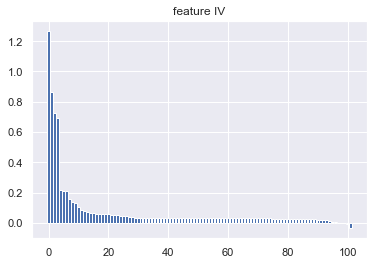

In [21]:
#如下取到每个变量分箱后的WOE和该变量的IV值：
#第四步：WOE编码、计算IV
from utils import CalcWOE
WOE_dict = {}
IV_dict = {}
# 分箱后的变量进行编码，包括：
# 1，初始取值个数小于5，且不需要合并的类别型变量。存放在less_value_features中
# 2，初始取值个数小于5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 3，初始取值个数超过5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 4，连续变量。分箱后新的变量存放在var_bin_list中
all_var = var_bin_list  + less_value_features
for var in all_var:
    #print("do ",var)
    woe_iv = CalcWOE(data, var, 'target')
    WOE_dict[var] = woe_iv['WOE']
    IV_dict[var] = woe_iv['IV']
    #print("finish {}".format(var))
    
file4 = open(path+'WOE_dict.pkl','wb+')
pickle.dump(WOE_dict,file4)
file4.close()

#将变量IV值进行降序排列，方便后续挑选变量
IV_dict_sorted = sorted(IV_dict.items(), key=lambda x: x[1], reverse=True)
IV_values = [i[1] for i in IV_dict_sorted]
IV_name = [i[0] for i in IV_dict_sorted]
plt.title('feature IV')
plt.bar(range(len(IV_values)),IV_values)

### 单变量分析和多变量分析

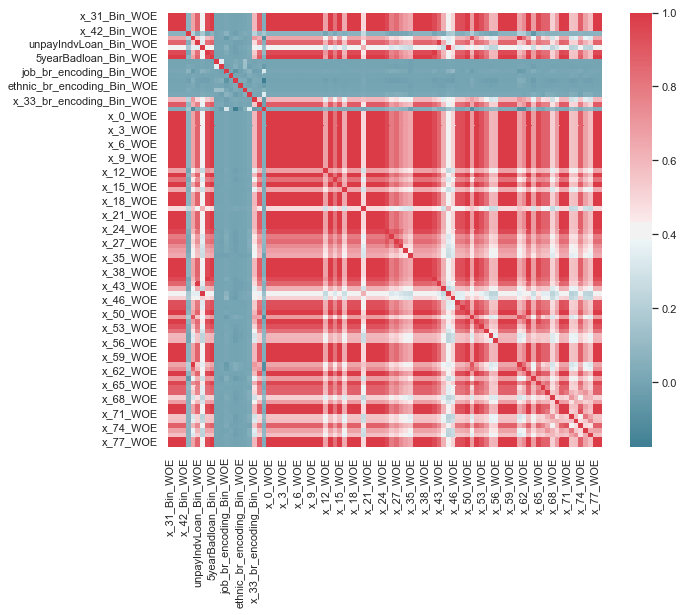

In [22]:
#第五步：单变量分析和多变量分析，均基于WOE编码后的值。
#（1）选择IV高于0.01的变量
#（2）比较两两线性相关性。如果相关系数的绝对值高于阈值，剔除IV较低的一个
#选取IV>0.01的变量

high_IV = {k:v for k, v in IV_dict.items() if v >= 0.02}
high_IV_sorted = sorted(high_IV.items(),key=lambda x:x[1],reverse=True)
 
short_list = high_IV.keys()
short_list_2 = []
for var in short_list:
    newVar = var + '_WOE'
    data[newVar] = data[var].map(WOE_dict[var])
    data.drop(var,axis=1,inplace=True)
    short_list_2.append(newVar)

#对于上一步的结果，计算相关系数矩阵，并画出热力图进行数据可视化
data = data[short_list_2]
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [23]:
print(data.columns.tolist())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

In [24]:
data.head()

,x_31_Bin_WOE,x_32_Bin_WOE,x_39_Bin_WOE,x_42_Bin_WOE,lmt_Bin_WOE,ncloseCreditCard_Bin_WOE,unpayIndvLoan_Bin_WOE,unpayOtherLoan_Bin_WOE,unpayNormalLoan_Bin_WOE,5yearBadloan_Bin_WOE,...,x_69_WOE,x_70_WOE,x_71_WOE,x_72_WOE,x_73_WOE,x_74_WOE,x_75_WOE,x_76_WOE,x_77_WOE,x_78_WOE
0,-0.086165,-0.086165,-0.086165,-0.086165,-0.203419,-0.046008,-0.12599,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.125970,-0.035673,-0.06582,-0.086165,-0.086165
1,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.12599,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.125970,-0.035673,-0.06582,-0.086165,-0.086165
2,-0.086165,-0.086165,-0.086165,-0.086165,-1.664694,-0.558264,-0.12599,-1.097170,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.125970,-0.035673,-0.06582,-0.086165,-0.086165
3,-0.086165,-0.086165,-0.086165,-0.086165,-0.203419,-0.046008,-0.12599,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.393995,-0.035673,-0.06582,-0.086165,-0.086165
4,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.12599,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.156744,-0.022037,-0.073735,-0.125970,-0.035673,-0.06582,-0.086165,-0.086165


In [25]:
##两两间的线性相关性检验
##1，将候选变量按照IV进行降序排列
##2，计算第i和第i+1的变量的线性相关系数
##3，对于系数超过阈值的两个变量，剔除IV较低的一个
#deleted_index = []
#cnt_vars = len(high_IV_sorted)
#for i in range(cnt_vars):
#    if i in deleted_index:
#        continue
#    x1 = high_IV_sorted[i][0]+"_WOE"
#    for j in range(cnt_vars):
#        if i == j or j in deleted_index:
#            continue
#        y1 = high_IV_sorted[j][0]+"_WOE"
#        roh = np.corrcoef(data[x1],data[y1])[0,1]
#        if abs(roh)>0.7:
#            x1_IV = high_IV_sorted[i][1]
#            y1_IV = high_IV_sorted[j][1]
#            if x1_IV > y1_IV:
#                deleted_index.append(j)
#            else:
#                deleted_index.append(i)
#
#multi_analysis_vars_1 = [high_IV_sorted[i][0]+"_WOE" for i in range(cnt_vars) if i not in deleted_index]

In [26]:
#data.replace(np.inf,0, inplace=True)
#data[multi_analysis_vars_1]

In [27]:
##多变量分析：VIF
#from utils import variance_inflation_factor
#
#X = np.matrix(data[multi_analysis_vars_1])
#VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
#max_VIF = max(VIF_list)
#print(max_VIF)
## 最大的VIF是1.32267733123(小于10)，因此这一步认为没有多重共线性
#multi_analysis = multi_analysis_vars_1

In [141]:
print(data.columns.tolist())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

In [144]:
data.x_71_WOE.value_counts()

-0.156744    98438
-0.223806    33280
-3.885592      311
Name: x_71_WOE, dtype: int64

### 特征分箱完成

In [25]:
#features = data.columns.tolist()
#features.remove('target')
X = data
y = train_y['target']

In [143]:
print(data.columns.tolist())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

In [215]:
print(X.columns.tolist())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

In [216]:
print(X.shape,y.shape)

(132029, 92) (132029,)


## OneHotEncoder for categary feature

**Is OneHotEncoder really needed for XGBoost?**

**geher:**

This is a difficult question to answer, and has been discussed here before. 
**XGBoost and other tree models** typically don't require one hot encoding like linear models do. This is because the ordering of labels when using label encoding matters less for trees. One hot encoding for tree based algorithms may also perform poorly due to reasons discussed in the book Elements of Machine Learning (Hastie/Tibshirani/Friedman):

"The partitioning algorithm favor categorical predictors with many levels q; the number of partitions grows exponentially in q, and the more choices we have, the more likely we can ﬁnd a good one for the data at hand. This can lead to severe overﬁtting if q is large, and such variables should be avoided."

> some further reading: https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931

**miguel perez:**

the topic is quite documented, short answer to your question would be no, **it is not needed**. Maybe you will find interesting this recent thead that deepens more on the subject of encoding in tree based models
> https://www.kaggle.com/c/zillow-prize-1/discussion/38793#218281

In [49]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#
##Fit OneHotEncoder
#ohe = OneHotEncoder(categories='auto', sparse=True, dtype='uint64').fit(train_x)
#train_x = ohe.transform(train_x)
#test_x = ohe.transform(test_x)

## Splitting the Data 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
sss = StratifiedShuffleSplit(n_splits=5, random_state=None)

#features=data.columns.tolist()
#features.remove('target')

#X = data[features]
#y = data['target']


#X = train_x
#y = train_y['target']
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [121534  99278  89333 ...   9592  36708   4031] Test: [ 29814  43687  98414 ...  47351 130692  37024]
Train: [ 93018  21431  90993 ...  33694 117960  48632] Test: [125772  90605  70166 ...  54115   7590  49330]
Train: [125249  72080  99949 ... 101678 131741 106946] Test: [112061   7862  42002 ...  77236  45625  39317]
Train: [ 74602 113552 130845 ...  27983  68641  63068] Test: [ 51106 116986  43575 ...  16590  63940    441]
Train: [84486 53236 60905 ... 38962 89955 17596] Test: [93633  2033 69418 ... 23367 16147 74896]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99273728 0.00726272]
[0.99272893 0.00727107]


In [7]:
train_x.shape

(132029, 100)

In [8]:
original_Xtrain.shape[0] + original_Xtest.shape[0]

132029

In [79]:
X.head()

,x_31_WOE,x_32_WOE,x_39_WOE,x_42_WOE,residentAddr_br_encoding_Bin_WOE,certId_br_encoding_Bin_WOE,bankCard_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,lmt_Bin_WOE,x_45_WOE,...,x_29_WOE,x_47_WOE,x_27_WOE,x_49_WOE,x_76_WOE,highestEdu_br_encoding_Bin_WOE,x_53_WOE,x_34_br_encoding_Bin_WOE,x_65_WOE,x_43_WOE
0,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.018245,0.204776,...,-0.006651,-0.03432,-0.024994,-0.014799,0.037915,-0.041690,-0.030708,0.167485,-0.060854,-0.018581
1,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,-0.941905,0.297508,0.523491,0.204776,...,-0.006651,-0.03432,-0.024994,0.491496,0.037915,0.379700,-0.030708,0.167485,0.095412,-0.018581
2,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.856257,-0.791066,...,-0.006651,-0.03432,-0.024994,-0.014799,0.037915,-0.727941,-0.030708,-0.069533,-0.060854,-0.018581
3,0.000000,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.018245,0.204776,...,-0.006651,-0.03432,0.370820,-0.014799,0.037915,-0.041690,0.250498,-0.069533,-0.060854,-0.018581
4,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,-1.854680,0.523491,0.204776,...,-0.006651,-0.03432,0.370820,-0.014799,0.037915,0.379700,-0.030708,-0.014216,-0.060854,-0.018581


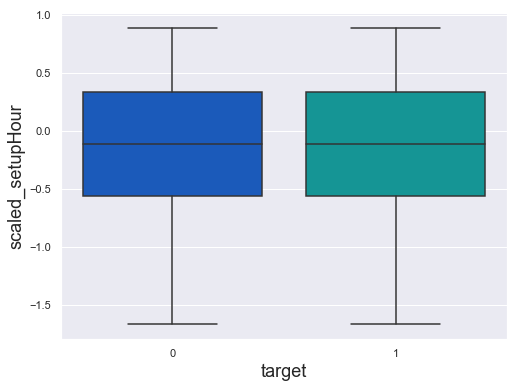

In [35]:
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

plt.figure(figsize=(8, 6))
plt.xlabel("target",fontsize=18)
plt.ylabel("scaled_setupHour",fontsize=18)
#plt.yscale('log')

sns.boxplot(x='target',y='scaled_setupHour',data=new_df,palette='winter')

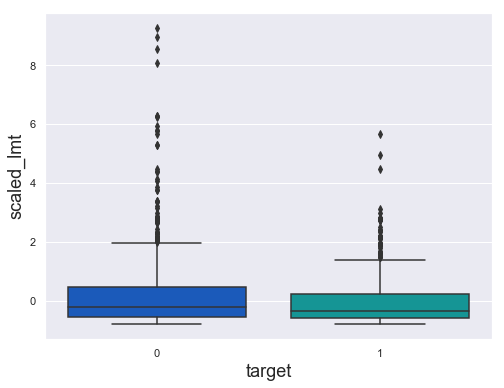

In [42]:
plt.figure(figsize=(8, 6))
plt.xlabel("target",fontsize=18)
plt.ylabel("scaled_lmt",fontsize=18)
#plt.yscale('log') 

sns.boxplot(x='target',y='scaled_lmt',data=new_df,palette='winter')

## Anomaly Detection

## Train Model

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score

In [38]:
import gc 
gc.collect()

20

### train by randomforest with SMOTE during cross-validation

In [ ]:
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

from sklearn.ensemble import RandomForestClassifier


# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# 实例化随机森林分类函数类
forest_clf=RandomForestClassifier(random_state=42)

# 建立需要搜索的参数的范围
param_grid =[{'n_estimators':[10,30,50,100],
             'max_depth':[50,100]}]

#rand_forest_clf = RandomizedSearchCV(forest_clf, param_grid, n_iter=4)
grid_forest_clf = GridSearchCV(forest_clf, param_grid,cv=5,n_jobs=-1,verbose=3)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

##init best model
best_est = forest_clf

for train, test in sss.split(original_Xtrain, original_ytrain):
    print("Train-:", train, "Test:-", test)
    ## SMOTE happens during Cross Validation not before..
    print("make pipeline .....")
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_forest_clf) 
    print("fit model ......")
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    print("fit model finish!")
    best_est = grid_forest_clf.best_estimator_
    print("predict.....")
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    print("cur AUC:{}".format(roc_auc_score(original_ytrain[test], prediction)))
    print("***" * 45)
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print("AUC:{}".format(np.mean(auc_lst)))
print('---' * 45)

Train-: [62746 93482 45104 ... 30032 11888 81185] Test:- [ 22291  69061  46695 ... 100873  30582  64193]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.4min finished


fit model finish!
predict.....
cur AUC:0.511246454064987
***************************************************************************************************************************************
Train-: [ 15649  92095 102474 ...    178  16619 117397] Test:- [ 63206  11613 104053 ...  33319  12398  89415]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


fit model finish!
predict.....
cur AUC:0.5289850001281367
***************************************************************************************************************************************
Train-: [ 92295  78192   9903 ... 100659  50431  81995] Test:- [100503  70136 106557 ...  96239 113309  79302]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.5min finished


fit model finish!
predict.....
cur AUC:0.5057291861746483
***************************************************************************************************************************************
Train-: [ 56844  74037  63559 ... 106769 111407  60883] Test:- [ 20786  94471   5660 ...  87004 107939   3419]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


### BalancedRandomForestClassifier  
平衡的随机森林会随机对每个Boostrap样本进行欠采样以使其平衡。

[R2d8f3e873ec3-1]	Chen，Chao，Andy Liaw和Leo Breiman。“使用随机森林来学习不平衡的数据。”加州大学伯克利分校110（2004）：1-12。

https://imbalanced-learn.org/en/stable/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

#### 使用BalancedRandomForestClassifier训练模型

In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier
bclf = BalancedRandomForestClassifier(max_depth=100, random_state=42,criterion='gini',sampling_strategy='majority',n_jobs=-1,oob_score=True)
bclf.fit(original_Xtrain, original_ytrain)
#print(clf.feature_importances_) 
prediction = bclf.predict(original_Xtest)

print("AUC:{}".format(roc_auc_score(original_ytest, prediction)))
print(bclf.get_params)

AUC:0.8072368295567255
<bound method BaseEstimator.get_params of BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=100,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=-1, oob_score=True, random_state=42,
                               replacement=False, sampling_strategy='majority',
                               verbose=0, warm_start=False)>


In [28]:
#将模型保存
saveModel =open(path+'BFC_Model_Normal_AUC_0.80.pkl','wb+')
pickle.dump(bclf,saveModel)
saveModel.close()

#### 将模型应用在测试数据集上

In [145]:
X.shape

(132029, 92)

In [146]:
print(X.columns)

Index(['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE',
       'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE',
       'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE',
       '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE',
       'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE',
       'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE',
       'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE',
       'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE',
       'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE',
       'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE',
       'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE',
       'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE',
       'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE',
       'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_W

In [147]:
test_x.head()

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew
0,132030,541202,1,2,28,540100,0,3,9.963,1,...,-999,0,9,6,1,0,1,0,0,1
1,132031,733521,1,1,42,730900,0,6,0.730,1,...,-999,0,4,6,1,0,1,0,0,1
2,132032,710231,1,2,43,710100,0,2,5.768,1,...,-999,0,18,5,1,1,1,0,0,1
3,132033,722122,3,2,32,722120,0,4,17.233,1,...,-999,-999,6,5,1,0,1,1,0,1
4,132034,641723,1,2,22,641700,0,4,0.463,3,...,-999,1,4,6,0,0,0,0,0,1


##### 加载模型

In [ ]:
##第一步：完成数据预处理
####在实际工作中，可以只清洗模型实际使用的字段

In [ ]:
##第二步：变量衍生

In [29]:
##第三步：分箱并代入WOE值
modelFile =open(path+'BFC_Model_Normal_AUC_0.80.pkl','rb+')
BFC_Model = pickle.load(modelFile)
modelFile.close()


file1 = open(path+'merge_bin_dict.pkl','rb+')
merge_bin_dict = pickle.load(file1)
file1.close()

file2 = open(path+'br_encoding_dict.pkl','rb+')
br_encoding_dict = pickle.load(file2)
file2.close()
 
file3 = open(path+'continous_merged_dict.pkl','rb+')
continous_merged_dict = pickle.load(file3)
file3.close()
 
file4 = open(path+'WOE_dict.pkl','rb+')
WOE_dict = pickle.load(file4)
file4.close()

In [154]:
len(continous_merged_dict)

23

In [30]:
fimpt = BFC_Model.feature_importances_
print(fimpt)
print(X.shape,fimpt.shape)

[2.60935549e-06 0.00000000e+00 5.75162299e-05 4.83703409e-05
 3.90099686e-02 5.96684474e-03 7.20349220e-03 1.83580756e-02
 7.77913439e-03 4.98974528e-06 8.54412400e-02 6.93288134e-02
 2.33258135e-02 1.61982047e-02 1.11375633e-01 2.61899101e-03
 1.51567777e-01 3.64828300e-02 2.81859485e-02 3.14167304e-02
 5.58762130e-02 5.07439667e-05 1.90333483e-05 0.00000000e+00
 1.54114094e-05 2.88988938e-05 0.00000000e+00 1.53841631e-06
 0.00000000e+00 2.04874324e-04 8.64345798e-05 1.98859324e-05
 3.64320750e-06 3.83160006e-03 5.40931017e-05 1.11913407e-02
 3.80246863e-05 6.52363656e-04 8.78465707e-06 2.39878115e-04
 8.06134552e-06 6.81111281e-03 4.56702902e-06 5.82339510e-06
 3.14203706e-05 5.73859590e-05 1.11001051e-02 6.70868007e-03
 5.15046088e-03 4.45993580e-03 1.71275565e-04 9.67915986e-04
 5.81446049e-05 1.97546960e-05 6.49686366e-06 1.22191298e-05
 8.45734487e-03 7.12018429e-03 6.58920168e-04 1.98319548e-02
 1.79863781e-02 7.42141121e-03 6.25390686e-03 9.04891152e-03
 7.88987051e-03 1.112735

In [80]:
print(X.columns.tolist())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

##### 处理测试数据集

In [32]:
##original_Xtest
from utils import ModifyDf
testData =  test_x.copy()

for var in X.columns:    
    print("begin solve:",var)
    #var1 = var.replace('_Bin_WOE','')
    if var.find('_Bin_WOE')>-1:
        #print("match _Bin_WOE")
        var1 = var.replace('_Bin_WOE','')
    elif var.find('_WOE')>-1:
        #print("match _WOE")
        var1 = var.replace('_WOE','')
    else:
        print("match nothing {}".format(var))
        
    print("after replace:",var1)

    #(1) 分类变量（取值< 5）
    # 有些取值个数少、但是需要合并的变量
    if var1 in merge_bin_dict.keys():
        print("{} need to be regrouped".format(var1))
        testData[var1 + '_Bin'] = testData[var1].map(merge_bin_dict[var1])

    elif var1 in continous_merged_dict.keys():
        #(2) 分类变量（取值> 5）
        # 有些变量需要用bad rate进行编码
        if var1.find('_br_encoding')>-1:
            var2 =var1.replace('_br_encoding','')
            print("{} need to be encoded by bad rate".format(var2))
            testData[var1] = testData[var2].map(br_encoding_dict[var2])
            #需要注意的是，有可能在测试样中某些值没有出现在训练样本中，从而无法得出对应的bad rate是多少。
            #故可以用最坏（即最大）的bad rate进行编码
            max_br = max(testData[var1])
            testData[var1] = testData[var1].map(lambda x: ModifyDf(x, max_br))
    
    
        #(3) 连续变量
        #上述处理后，需要加上连续型变量一起进行分箱
        if -999 not in set(testData[var1]):
            print("-999 not in testset",var1)
            testData[var1+'_Bin'] = testData[var1].map(lambda x: AssignBin(x, continous_merged_dict[var1]))
        else:
            print("-999 is in testset",var1)
            testData[var1 + '_Bin'] = testData[var1].map(lambda x: AssignBin(x, continous_merged_dict[var1],[-1,-999]))

    #WOE编码
    var3 = var.replace('_WOE','')
    testData[var] = testData[var3].map(WOE_dict[var3])

begin solve: x_31_Bin_WOE
after replace: x_31
x_31 need to be regrouped
begin solve: x_32_Bin_WOE
after replace: x_32
x_32 need to be regrouped
begin solve: x_39_Bin_WOE
after replace: x_39
x_39 need to be regrouped
begin solve: x_42_Bin_WOE
after replace: x_42
x_42 need to be regrouped
begin solve: lmt_Bin_WOE
after replace: lmt
-999 not in testset lmt
begin solve: ncloseCreditCard_Bin_WOE
after replace: ncloseCreditCard
-999 is in testset ncloseCreditCard
begin solve: unpayIndvLoan_Bin_WOE
after replace: unpayIndvLoan
-999 is in testset unpayIndvLoan
begin solve: unpayOtherLoan_Bin_WOE
after replace: unpayOtherLoan
-999 is in testset unpayOtherLoan
begin solve: unpayNormalLoan_Bin_WOE
after replace: unpayNormalLoan
-999 is in testset unpayNormalLoan
begin solve: 5yearBadloan_Bin_WOE
after replace: 5yearBadloan
-999 not in testset 5yearBadloan
begin solve: certId_br_encoding_Bin_WOE
after replace: certId_br_encoding
certId need to be encoded by bad rate
-999 not in testset certId_br_e

In [33]:
features = data.columns.to_list()
test_data_x = testData[features]
test_data_x.head()

,x_31_Bin_WOE,x_32_Bin_WOE,x_39_Bin_WOE,x_42_Bin_WOE,lmt_Bin_WOE,ncloseCreditCard_Bin_WOE,unpayIndvLoan_Bin_WOE,unpayOtherLoan_Bin_WOE,unpayNormalLoan_Bin_WOE,5yearBadloan_Bin_WOE,...,x_69_WOE,x_70_WOE,x_71_WOE,x_72_WOE,x_73_WOE,x_74_WOE,x_75_WOE,x_76_WOE,x_77_WOE,x_78_WOE
0,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.125990,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.125970,-0.035673,-0.065820,-0.086165,-0.086165
1,-0.086165,-0.086165,-0.086165,-0.086165,-1.664694,-0.046008,-0.125990,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.156744,-0.778874,-0.073735,-0.125970,-0.499771,-1.170611,-0.086165,-0.086165
2,-0.086165,-0.086165,-0.086165,-0.086165,-0.203419,-0.046008,-0.427255,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.156744,-0.022037,-0.073735,-0.125970,-0.035673,-0.065820,-0.086165,-0.086165
3,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.125990,0.073948,-0.315963,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.393995,-0.035673,-0.065820,-0.086165,-0.086165
4,-0.086165,-0.086165,-0.086165,-0.086165,-1.664694,-0.558264,-0.125990,-1.097170,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.393995,-0.035673,-0.065820,-0.086165,-0.086165


In [34]:
print(data.columns.to_list())

['x_31_Bin_WOE', 'x_32_Bin_WOE', 'x_39_Bin_WOE', 'x_42_Bin_WOE', 'lmt_Bin_WOE', 'ncloseCreditCard_Bin_WOE', 'unpayIndvLoan_Bin_WOE', 'unpayOtherLoan_Bin_WOE', 'unpayNormalLoan_Bin_WOE', '5yearBadloan_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'job_br_encoding_Bin_WOE', 'basicLevel_br_encoding_Bin_WOE', 'bankCard_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'linkRela_br_encoding_Bin_WOE', 'x_33_br_encoding_Bin_WOE', 'x_34_br_encoding_Bin_WOE', 'loanProduct_WOE', 'x_0_WOE', 'x_1_WOE', 'x_2_WOE', 'x_3_WOE', 'x_4_WOE', 'x_5_WOE', 'x_6_WOE', 'x_7_WOE', 'x_8_WOE', 'x_9_WOE', 'x_10_WOE', 'x_11_WOE', 'x_12_WOE', 'x_13_WOE', 'x_14_WOE', 'x_15_WOE', 'x_16_WOE', 'x_17_WOE', 'x_18_WOE', 'x_19_WOE', 'x_20_WOE', 'x_21_WOE', 'x_22_WOE', 'x_23_WOE', 'x_24_WOE', 'x_25_WOE', 'x_26_WOE', 'x_27_WOE', 'x_28_WOE', 'x_30_WOE', 'x_35_WOE', 'x_36_WOE', 'x_37_WOE', 'x_38_WOE', 'x_40_WOE', 'x_41_WOE', 'x_43_WOE', 'x_44_WOE', 'x_45_WOE', 'x_46_WO

In [35]:
print(test_data_x.shape)

(23561, 92)


##### 用训练好的模型预测

In [36]:
y_pred = BFC_Model.predict(test_data_x)

In [37]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
y_pred = pd.DataFrame(y_pred, columns=['target'])
y_pred = pd.concat([test_x.id, y_pred],axis=1)
y_pred.to_csv('sub_bclf_lable_2019_11_05.csv', index=False)
y_pred.head()

,id,target
0,132030,0
1,132031,1
2,132032,1
3,132033,0
4,132034,1


### LGBMClassifier

In [42]:
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "boosting_type": "gbdt",
        "metric" : "auc",
        "num_leaves" : 100,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "max_bin": 512,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    #pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return model, evals_result

In [101]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# machine learning: XGB
import xgboost as xgb
import lightgbm as lgb

sm = SMOTE(sampling_strategy='minority',random_state=42)
original_Xtrain_res, original_ytrain_res = sm.fit_resample(original_Xtrain, original_ytrain)

print('Resampled dataset shape %s' % Counter(original_ytrain_res))
model_lgb, evals_result = run_lgb(original_Xtrain_res, original_ytrain_res, original_Xtest, original_ytest)

Resampled dataset shape Counter({0: 117963, 1: 117963})
Training until validation scores don't improve for 100 rounds.
[150]	training's auc: 0.999776	valid_1's auc: 0.88327
[300]	training's auc: 0.999978	valid_1's auc: 0.876452
Early stopping, best iteration is:
[218]	training's auc: 0.999938	valid_1's auc: 0.885258


In [102]:
print("roc_auc_score: \n {}\n".format(roc_auc_score(original_ytest, model_lgb.predict(original_Xtest))))
print("LightGBM Training Completed...")

roc_auc_score: 
 0.8852577185219095

LightGBM Training Completed...


In [45]:
test_data_x.head()

,x_31_Bin_WOE,x_32_Bin_WOE,x_39_Bin_WOE,x_42_Bin_WOE,lmt_Bin_WOE,ncloseCreditCard_Bin_WOE,unpayIndvLoan_Bin_WOE,unpayOtherLoan_Bin_WOE,unpayNormalLoan_Bin_WOE,5yearBadloan_Bin_WOE,...,x_69_WOE,x_70_WOE,x_71_WOE,x_72_WOE,x_73_WOE,x_74_WOE,x_75_WOE,x_76_WOE,x_77_WOE,x_78_WOE
0,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.125990,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.125970,-0.035673,-0.065820,-0.086165,-0.086165
1,-0.086165,-0.086165,-0.086165,-0.086165,-1.664694,-0.046008,-0.125990,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.156744,-0.778874,-0.073735,-0.125970,-0.499771,-1.170611,-0.086165,-0.086165
2,-0.086165,-0.086165,-0.086165,-0.086165,-0.203419,-0.046008,-0.427255,0.073948,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.156744,-0.022037,-0.073735,-0.125970,-0.035673,-0.065820,-0.086165,-0.086165
3,-0.086165,-0.086165,-0.086165,-0.086165,0.140440,-0.046008,-0.125990,0.073948,-0.315963,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.393995,-0.035673,-0.065820,-0.086165,-0.086165
4,-0.086165,-0.086165,-0.086165,-0.086165,-1.664694,-0.558264,-0.125990,-1.097170,-0.146222,-0.086173,...,-0.08267,-0.086165,-0.223806,-0.022037,-0.073735,-0.393995,-0.035673,-0.065820,-0.086165,-0.086165


In [92]:
y_pred_lgb = model_lgb.predict(test_data_x)
y_pred_lgb = pd.DataFrame(y_pred, columns=['target'])
y_pred_lgb = pd.concat([test_x.id, y_pred_lgb],axis=1)
y_pred_lgb['target'] = y_pred_lgb['target'].apply(lambda x:1 if x>=0.2 else 0)

In [99]:
print(y_pred_lgb.target.value_counts())

0    23396
1      165
Name: target, dtype: int64


In [97]:
t_0_ = train_y.target.value_counts()[0] 
t_1_ = train_y.target.value_counts()[1] 

print("train default ratio:{}".format(t_1_ / (t_0_ + t_1_)) )

p_0_ = y_pred_lgb.target.value_counts()[0] 
p_1_ = y_pred_lgb.target.value_counts()[1] 

print("test default ratio:{}".format(p_1_ / (p_0_ + p_1_)) )

train default ratio:0.0072635557339675375
test default ratio:0.007003098340477908


In [100]:
y_pred_lgb.to_csv('sub_lgbm_lable_2019_11_05.csv', index=False)
y_pred_lgb.head()

,id,target
0,132030,0
1,132031,0
2,132032,0
3,132033,0
4,132034,0
